In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_predict

from sklearn.externals import joblib

In [31]:
df=pd.read_csv('space.csv')
pd.set_option('display.max_columns',None)

In [32]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [33]:
df.shape

(10000, 18)

In [34]:
df.dtypes  #dependents column is in object type but the data are numerical. 

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

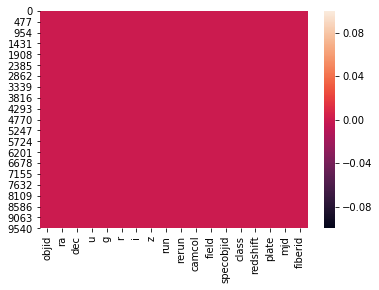

In [35]:
sns.heatmap(df.isnull())#there are no missing values in the dataset

In [36]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [ ]:
#outliers are present in some columns as difference between mean value and max value is very high.

# EDA

In [14]:
#checking relation of each attribute w.r.t target attribute

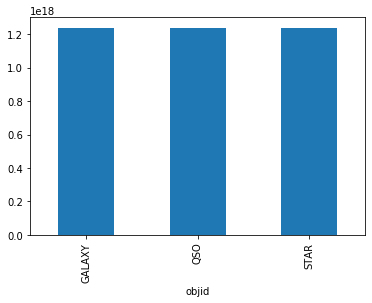

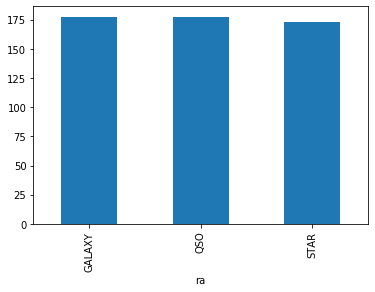

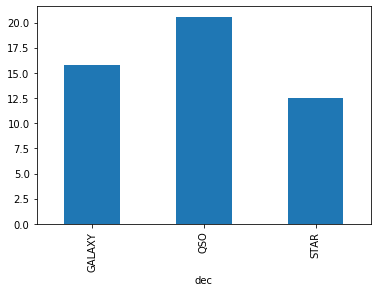

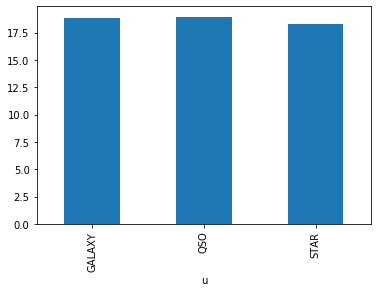

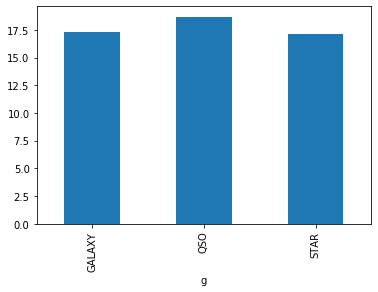

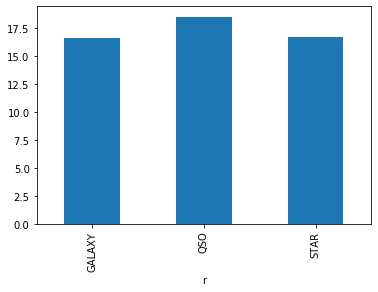

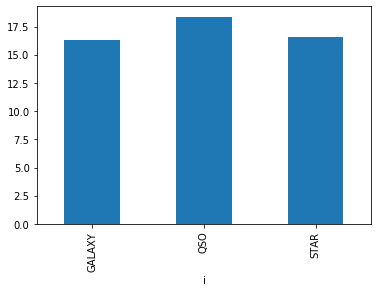

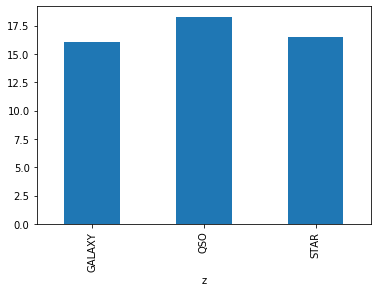

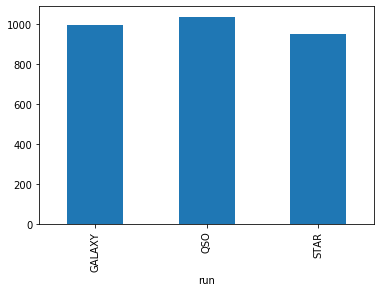

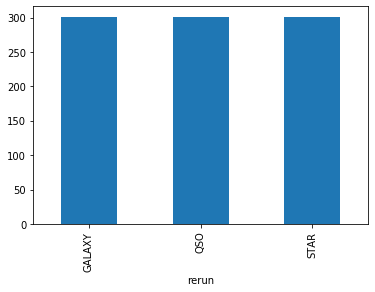

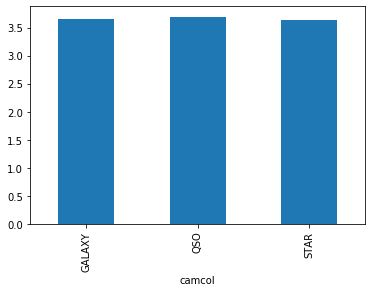

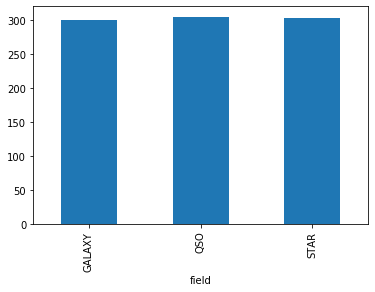

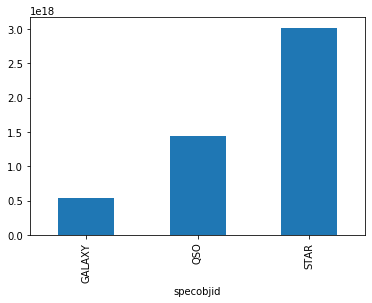

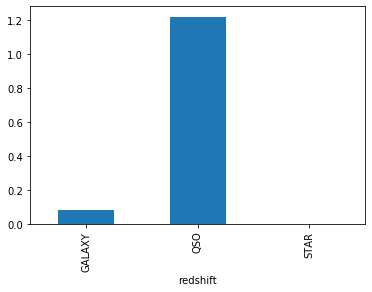

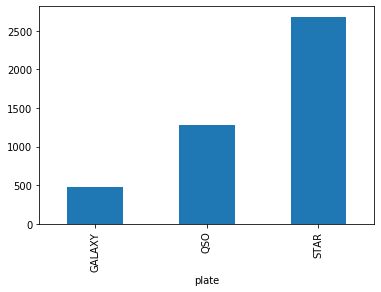

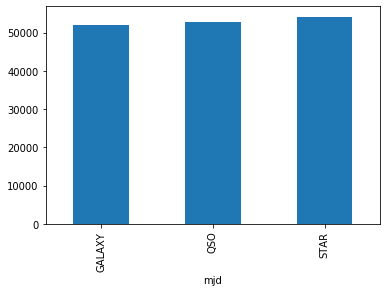

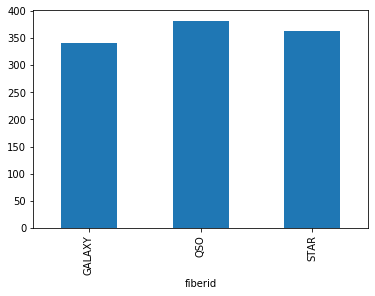

In [9]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df.groupby('class')[feature].mean().plot.bar()
    plt.xlabel(feature)
    plt.show()


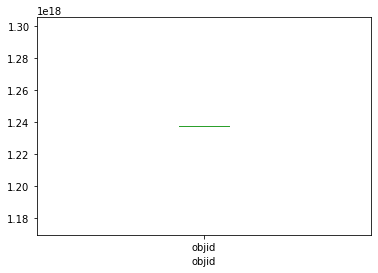

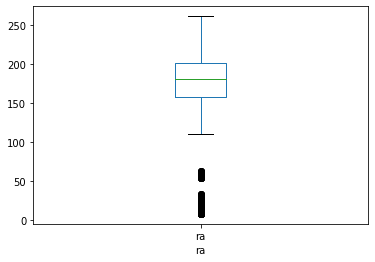

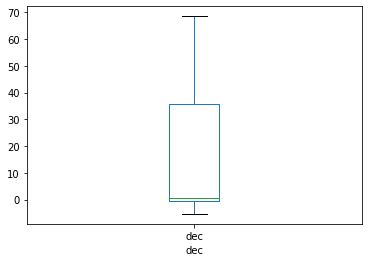

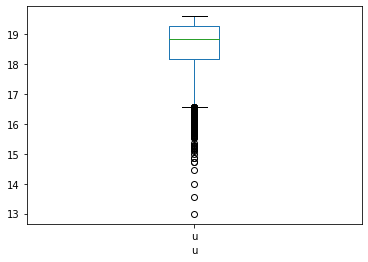

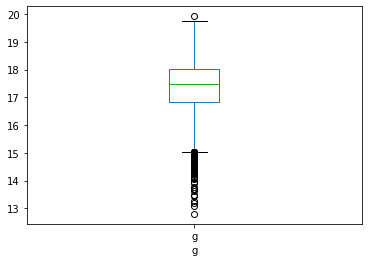

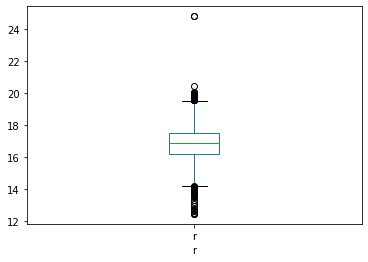

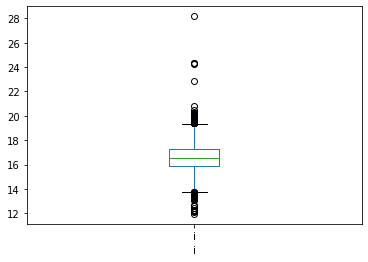

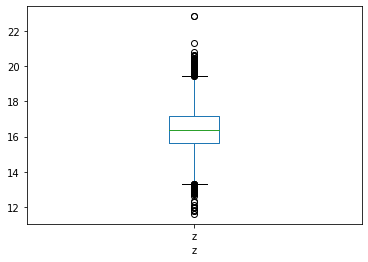

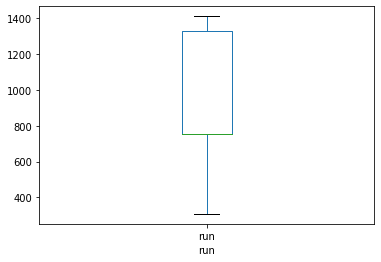

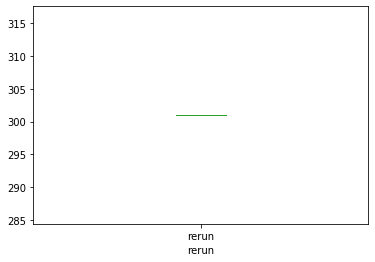

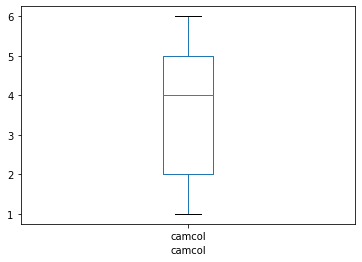

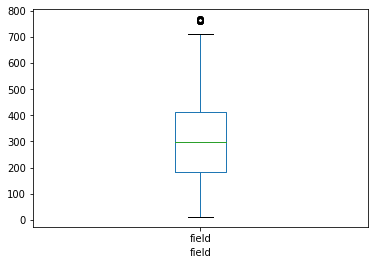

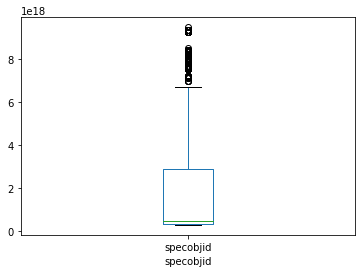

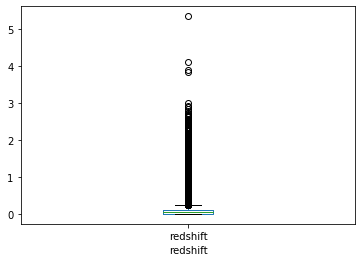

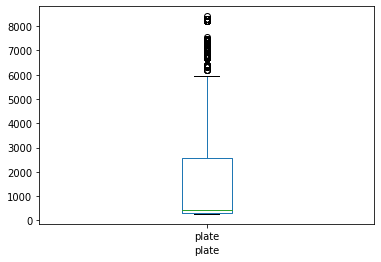

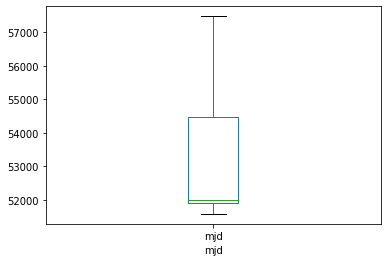

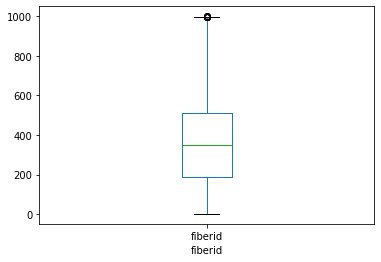

In [10]:
#checking for outliers

numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

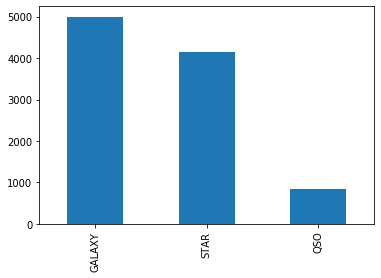

In [11]:
#checking if imbalanced dataset
df['class'].value_counts().plot.bar()

# Feature Engineering

In [7]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [8]:
#Replacing instead of label encoding because we want Yes=1 & No=0
df['class']=df['class'].replace(['GALAXY','STAR','QSO'],[0,1,2])

In [9]:
df['class'].value_counts()

0    4998
1    4152
2     850
Name: class, dtype: int64

In [10]:
df.corr()
##none of the negatively correlated columns with the target have very high values.no need to delete any column.

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,-3.024669e-16,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,-2.399917e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,1.451253e-03,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,-1.220096e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,2.007484e-01,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,3.448998e-01,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,4.176314e-01,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,4.654747e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,-1.795842e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Removing outliers

In [11]:
from scipy.stats import zscore
z=abs(zscore(df))
z.shape

(10000, 18)

In [12]:
df1=df[(z<3).all(axis=1)]
df1.shape

(0, 18)

In [13]:
#the whole dataset is getting deleted.hence we are skipping this step

# Separating target and independent variables

In [14]:
y=df['class']
X=df.drop(['class'],axis=1)

# Applying Power transformation to remove skewness

In [15]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
X_power=pt.fit_transform(X)
df=pd.DataFrame(X_power,columns=X.columns)

In [16]:
df.skew()

objid        0.000000
ra          -0.154576
dec         -0.483246
u           -0.230857
g           -0.004435
r            0.016190
i            0.001939
z            0.000961
run          0.011906
rerun        0.000000
camcol      -0.151388
field       -0.145970
specobjid    0.000000
redshift     0.858765
plate        0.404242
mjd          0.939098
fiberid     -0.189274
dtype: float64

In [17]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,0.0,0.074086,-0.298528,1.324181,-0.433886,-0.838930,-0.945828,-0.997552,-0.822117,0.0,0.229734,-0.128458,0.0,-0.938967,1.326782,1.338791,0.708178
1,0.0,0.075736,-0.286965,-0.203686,-0.254928,-0.158741,-0.053533,0.004403,-0.822117,0.0,0.229734,-0.128458,0.0,-0.940055,-0.806801,-0.924403,0.909667
2,0.0,0.077749,-0.289243,1.112203,0.873282,0.590340,0.465800,0.342372,-0.822117,0.0,0.229734,-0.122352,0.0,0.939831,-1.017960,-0.621582,0.797640
3,0.0,0.082435,-0.308940,-1.190591,-0.866043,-0.639665,-0.506464,-0.406667,-0.822117,0.0,0.229734,-0.116251,0.0,-0.941375,1.326782,1.338791,0.785517
4,0.0,0.082749,-0.295227,-1.352749,-1.175903,-0.380877,0.004297,0.188178,-0.822117,0.0,0.229734,-0.116251,0.0,-0.924806,1.326782,1.338791,0.793602


# Scaling the Data

In [18]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(df)
x=pd.DataFrame(data=X_scaled,columns=df.columns)


In [19]:
x.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,0.0,0.074086,-0.298528,1.324181,-0.433886,-0.838930,-0.945828,-0.997552,-0.822117,0.0,0.229734,-0.128458,0.0,-0.938967,1.326782,1.343947,0.708178
1,0.0,0.075736,-0.286965,-0.203686,-0.254928,-0.158741,-0.053533,0.004403,-0.822117,0.0,0.229734,-0.128458,0.0,-0.940055,-0.806801,-0.919277,0.909667
2,0.0,0.077749,-0.289243,1.112203,0.873282,0.590340,0.465800,0.342372,-0.822117,0.0,0.229734,-0.122352,0.0,0.939831,-1.017960,-0.616451,0.797640
3,0.0,0.082435,-0.308940,-1.190591,-0.866043,-0.639665,-0.506464,-0.406667,-0.822117,0.0,0.229734,-0.116251,0.0,-0.941375,1.326782,1.343947,0.785517
4,0.0,0.082749,-0.295227,-1.352749,-1.175903,-0.380877,0.004297,0.188178,-0.822117,0.0,0.229734,-0.116251,0.0,-0.924806,1.326782,1.343947,0.793602


# Model Building

In [20]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [22]:
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()

rfc=RandomForestClassifier()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

In [23]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))

models.append(('RandomForestClassifier',rfc))
models.append(('XGBClassifier',xgb))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',ada))

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score

***************** KNeighborsClassifier *******************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score  - 0.9584


cross_val_score  - 0.9567016833016833


classification report
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1250
           1       0.96      0.96      0.96      1038
           2       0.97      0.94      0.95       212

    accuracy                           0.96      2500
   macro avg       0.96      0.95      0.96      2500
weighted avg       0.96      0.96      0.96      2500



[[1202   41    7]
 [  44  994    0]
 [  12    0  200]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)
***************** SVC *******************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    ke

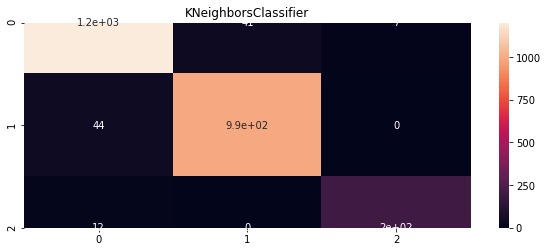

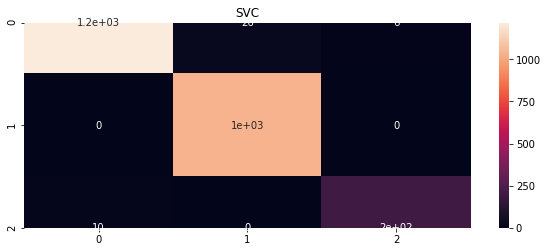

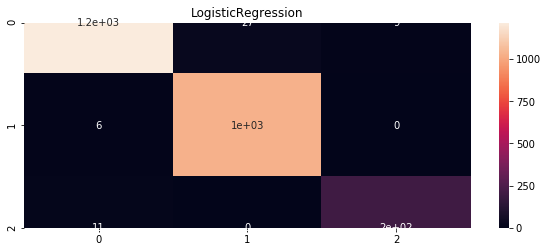

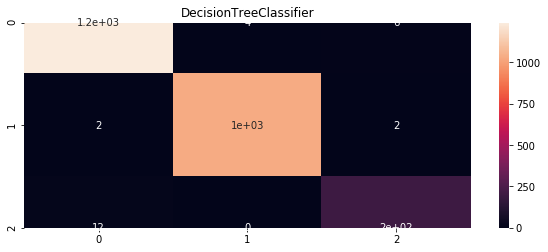

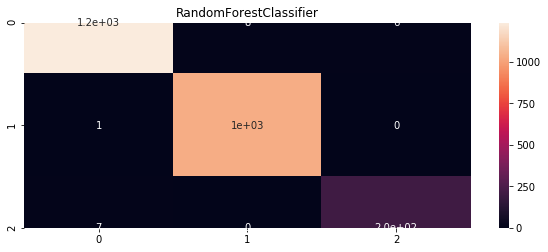

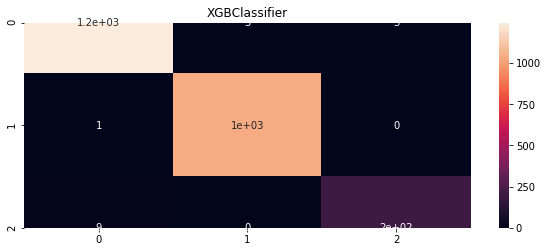

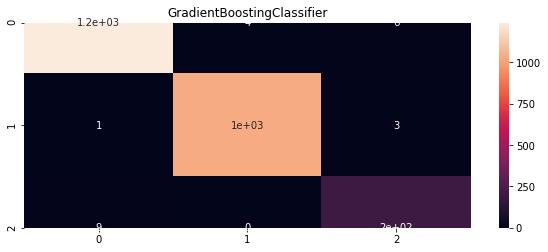

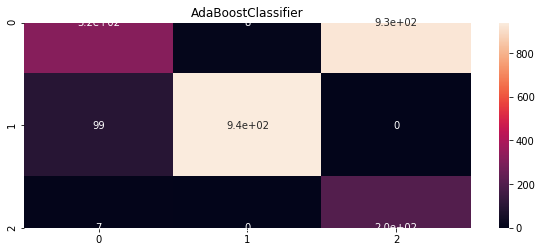

In [29]:
Model=[]
score=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
        
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    
    

In [30]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cv})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,95.84,95.670168
1,SVC,98.32,98.440009
2,LogisticRegression,97.88,97.920109
3,DecisionTreeClassifier,98.96,98.290009
4,RandomForestClassifier,99.12,98.789980
5,XGBClassifier,99.36,99.199930
6,GradientBoostingClassifier,99.08,98.999960
7,AdaBoostClassifier,58.40,85.071994


In [31]:
#We can see from the table XGBClassifier is the best performing Algorithms.

In [32]:
#First lets calculate the random state of the models at which they perform the best.
#Then we will select the top3 models and do gridsearchcv on them.

# Finding the best random_state 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,recall_score
from sklearn.linear_model import LogisticRegression
def maxaccuracy_score(model,x,y):
    max_accuracy=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,stratify=y)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=accuracy_score(y_test,pred)
        
        if score>max_accuracy:
            max_accuracy=score
            final_r_state=r_state
    print('max_accuracy_score is at random_state  ',final_r_state,'  which is  ',max_accuracy)
    return final_r_state

In [34]:
print('knn',maxaccuracy_score(knn,x,y))
print('svc',maxaccuracy_score(svc,x,y))
print('lr',maxaccuracy_score(lr,x,y))
print('dt',maxaccuracy_score(dt,x,y))

print('rfc',maxaccuracy_score(rfc,x,y))
print('xgb',maxaccuracy_score(xgb,x,y))
print('gbc',maxaccuracy_score(gbc,x,y))
print('ada',maxaccuracy_score(ada,x,y))

max_accuracy_score is at random_state   64   which is   0.9688
knn 64
max_accuracy_score is at random_state   90   which is   0.9916
svc 90
max_accuracy_score is at random_state   85   which is   0.9856
lr 85
max_accuracy_score is at random_state   72   which is   0.99
dt 72
max_accuracy_score is at random_state   66   which is   0.994
rfc 66
max_accuracy_score is at random_state   49   which is   0.9948
xgb 49
max_accuracy_score is at random_state   52   which is   0.9928
gbc 52
max_accuracy_score is at random_state   66   which is   0.988
ada 66


In [35]:
#We can see XGBoostClassifier is performing the best at random_state=49
 
#selecting our top 4 models to be used for gridsearchcv

#model-1-->XGBoostClassifier(accuracy=99.48%) at random_state=49
#model-2-->GradientBoostingClassifier(accuracy=99.28%) at random_state=52
#model-3-->RandomForestClassifier(accuracy=99.24%) at random_state=66
#model-4-->SVC(accuracy=99.16%) at random_state=90

# GridSearchCV

# model-1-->XGBoostClassifier(accuracy=99.48%) at random_state=49

In [36]:
xgb=XGBClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49,stratify=y)

In [37]:
parameters=[{'max_depth':[5,7,9,10],'learning_rate':[1,0.1,0.001]}]
            
grid_search=GridSearchCV(xgb,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'learning_rate': 0.1, 'max_depth': 9}

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49,stratify=y)
xgb=XGBClassifier(learning_rate=0.1,max_depth=9)
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
score=accuracy_score(y_test,pred_xgb)
print('Accuracy_score=  ',score)

Accuracy_score=   0.9944


In [38]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
xgb=XGBClassifier(learning_rate=0.1,max_depth=9)
cvs=cross_val_score(xgb,x,y,scoring='accuracy',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.9911992982498244


array([[4965,    5,   49],
       [   8, 4147,    1],
       [  25,    0,  800]], dtype=int64)

# model-2-->GradientBoostingClassifier(accuracy=99.28%) at random_state=52

In [45]:
gbc=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=52,stratify=y)

In [46]:
parameters=[{'max_depth':[5,7,9,10],'learning_rate':[1,0.1,0.001],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(gbc,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=52,stratify=y)
gbc=GradientBoostingClassifier(learning_rate=0.1,max_depth=5,n_estimators=250)
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
score=accuracy_score(y_test,pred_gbc)
print('Accuracy_score=  ',score)

Accuracy_score=   0.9932


In [39]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
gbc=GradientBoostingClassifier(learning_rate=0.1,max_depth=5,n_estimators=250)
cvs=cross_val_score(gbc,x,y,scoring='accuracy',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(gbc,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.9904991981497997


array([[4960,    5,   51],
       [   7, 4147,    1],
       [  31,    0,  798]], dtype=int64)

# model-3-->RandomForestClassifier(accuracy=99.24%) at random_state=66

In [42]:
rfc=RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=66,stratify=y)

In [43]:
parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],
            'criterion':['gini','entropy'], 'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(rfc,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'n_estimators': 250}

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=66,stratify=y)
rfc=RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_leaf=1,n_estimators=250)
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
score=accuracy_score(y_test,pred_rfc)
print('Accuracy_score=  ',score)

Accuracy_score=   0.9916


In [40]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
gbc=GradientBoostingClassifier(learning_rate=0.1,max_depth=5,n_estimators=250)
cvs=cross_val_score(gbc,x,y,scoring='accuracy',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(gbc,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.9904991481247871


array([[4959,    5,   51],
       [   7, 4147,    1],
       [  32,    0,  798]], dtype=int64)

# model-4-->SVC(accuracy=99.16%) at random_state=90

In [39]:
svc=SVC()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90,stratify=y)

In [40]:
parameters=[{'C':[0.1,0.5,1,2],'kernel':['rbf','linear','poly']}]
            
grid_search=GridSearchCV(svc,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'C': 2, 'kernel': 'linear'}

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90,stratify=y)
svc=SVC(C=2,kernel='linear')
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
score=accuracy_score(y_test,pred_svc)
print('Accuracy_score=  ',score)

Accuracy_score=   0.9928


In [41]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
svc=SVC(C=2,kernel='linear')
cvs=cross_val_score(svc,x,y,scoring='accuracy',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(svc,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.9890994477248618


array([[4933,    0,   43],
       [  39, 4152,    1],
       [  26,    0,  806]], dtype=int64)

# Finally Saving the XGBClassifier model

In [42]:
#From all the model tried above XGBClassifier model cross_val_score is best ,
#corresponding random_state=63
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49,stratify=y)
xgb=XGBClassifier(learning_rate=0.1,max_depth=9)
xgb.fit(x_train,y_train)
cvs=cross_val_score(xgb,x,y,scoring='accuracy',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.9911992982498244


array([[4965,    5,   49],
       [   8, 4147,    1],
       [  25,    0,  800]], dtype=int64)

In [28]:
from sklearn.externals import joblib
joblib.dump(xgb,'project8-space.obj')

['project8-space.obj']

In [29]:
model=joblib.load('project8-space.obj')

In [30]:
Final_predictions=model.predict(x_test)
Final_predictions=pd.DataFrame(Final_predictions,columns=['GALAXY(0),STAR(1),QSO(2)'])
Final_predictions[:5]

,"GALAXY(0),STAR(1),QSO(2)"
0,0
1,2
2,0
3,1
4,1


# Saving final predictions in file.csv format

In [63]:
Final_predictions.to_csv('E:\\final_predictionsspace.csv',index=False)

# Conclusion:-